https://gsnchez.com/blog/article/Var-como-medida-de-riesgo

In [2]:
from scipy.stats import norm
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf
import numpy as np

In [4]:
symbols = ["AAPL", "META"]      
pesos = np.array([.20,.80])            
tickers = yf.Tickers(symbols)
data = tickers.history(start='2010-10-20',end='2012-10-20').Close.dropna()
returns = data.pct_change()[1:]

[*********************100%***********************]  2 of 2 completed


In [5]:
portfolio_mean = returns.mean().dot(pesos)
portfolio_stdev = np.sqrt(pesos.T.dot(returns.cov()).dot(pesos))

In [7]:
investment = int(1000000)

mean_investment = (1+portfolio_mean) * investment
stdev_investment = investment * portfolio_stdev

conf_level = 0.05
cut = norm.ppf(conf_level, mean_investment, stdev_investment)

var_1d = investment - cut 

days = int(252)

print(("\nLa pérdida máxima de tu cartera inicial de " + str(investment) + 
    " usd con un nivel de confianza del " + str((1 - conf_level) * 100) + "% y para los siguientes " + str(days) + " días es de:\n"))

var_array = []

for i in range(1, days+1):
    var_array.append(np.round(var_1d * np.sqrt(i), 2))
    print("A " + str(i) + " días, VaR(" + str((1 - conf_level) * 100) + "%) = " + str(((np.round(var_1d * np.sqrt(i), 2))))+ "   Portfolio : " +str((np.round(investment * (1+portfolio_mean)**(i),2 ))))


La pérdida máxima de tu cartera inicial de 1000000 usd con un nivel de confianza del 95.0% y para los siguientes 252 días es de:

A 1 días, VaR(95.0%) = 55650.06   Portfolio : 995694.62
A 2 días, VaR(95.0%) = 78701.07   Portfolio : 991407.78
A 3 días, VaR(95.0%) = 96388.74   Portfolio : 987139.4
A 4 días, VaR(95.0%) = 111300.13   Portfolio : 982889.39
A 5 días, VaR(95.0%) = 124437.32   Portfolio : 978657.68
A 6 días, VaR(95.0%) = 136314.26   Portfolio : 974444.19
A 7 días, VaR(95.0%) = 147236.23   Portfolio : 970248.84
A 8 días, VaR(95.0%) = 157402.15   Portfolio : 966071.55
A 9 días, VaR(95.0%) = 166950.19   Portfolio : 961912.24
A 10 días, VaR(95.0%) = 175980.95   Portfolio : 957770.85
A 11 días, VaR(95.0%) = 184570.38   Portfolio : 953647.28
A 12 días, VaR(95.0%) = 192777.47   Portfolio : 949541.47
A 13 días, VaR(95.0%) = 200649.16   Portfolio : 945453.34
A 14 días, VaR(95.0%) = 208223.47   Portfolio : 941382.8
A 15 días, VaR(95.0%) = 215531.77   Portfolio : 937329.79
A 16 días, Va

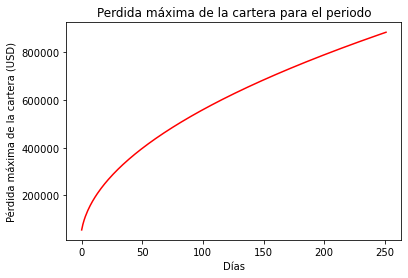

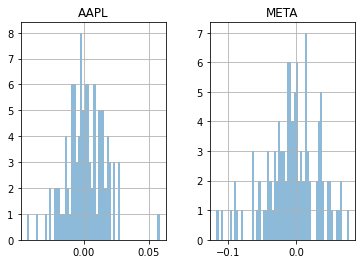

In [8]:
plt.xlabel("Días")
plt.ylabel("Pérdida máxima de la cartera (USD)")
plt.title("Perdida máxima de la cartera para el periodo")
plt.plot(var_array,"r")

returns.hist(bins=60,histtype="stepfilled",alpha=0.5)

plt.show()